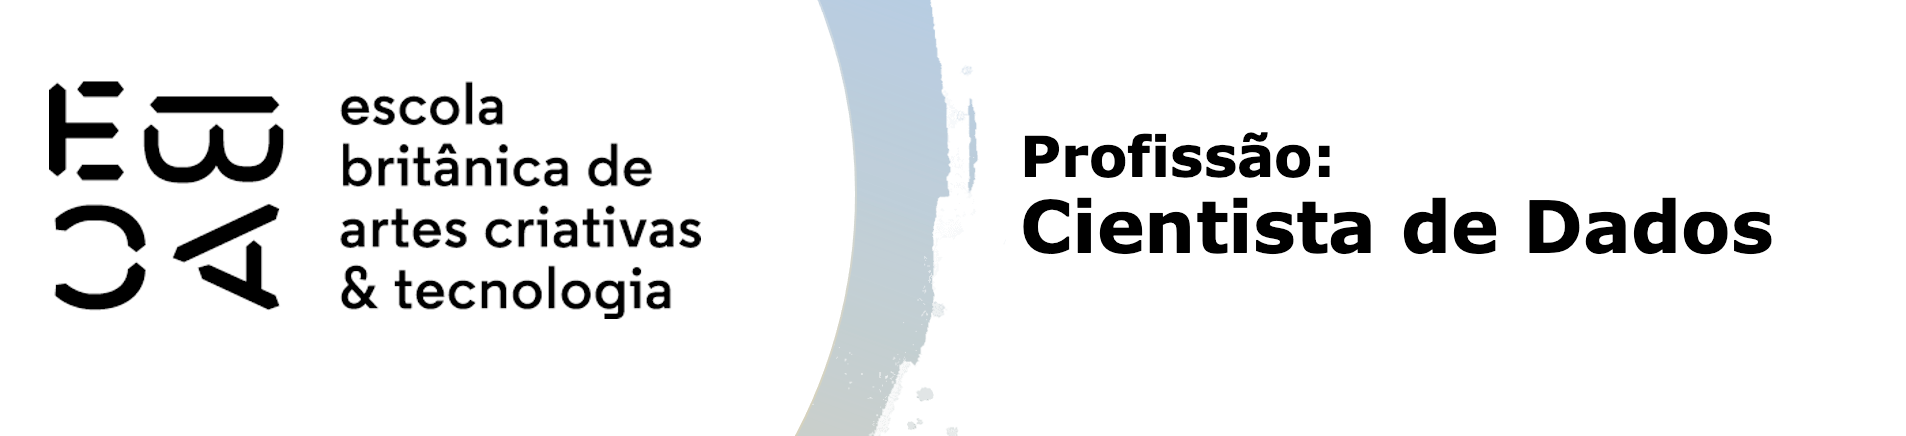

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

import seaborn as sns
import scipy.stats as stats

import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
print(df.shape)
df.head()

(750000, 13)


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [3]:
print(df.shape)
df.info()

(750000, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          624240 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


In [4]:
print(df['tempo_emprego'].mean())
df['tempo_emprego'].fillna(value=df['tempo_emprego'].mean(), inplace=True)
df.isna().sum()

7.746164800507006


index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [5]:
df['data'] = df.index
df['data'] = pd.to_datetime(df['data'])
df['log_renda'] = np.log(df.renda)
print(f'Primeiro data registrada no df: {df["data"].min()}')
print(f'Última data registrada no df: {df["data"].max()}')

Primeiro data registrada no df: 2015-01-01 00:00:00
Última data registrada no df: 2016-03-01 00:00:00


In [6]:
df_train = df[:'2015-12-01']
df_test = df['2016-03-01':]
print(df_train.shape)
df_train.tail(3)

(600000, 15)


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,data,log_renda
data_ref,,,,,,,,,,,,,,,
2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20,2015-12-01,8.543095
2015-12-01,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,27,6.791781,2.0,20449.25,2015-12-01,9.925701
2015-12-01,1103,F,S,S,1,Servidor público,Superior completo,Viúvo,Casa,49,1.164384,2.0,1935.87,2015-12-01,7.568312


In [7]:
print(df_test.shape)
df_test.head(3)

(50000, 15)


,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,data,log_renda
data_ref,,,,,,,,,,,,,,,
2016-03-01,13799,F,S,N,0,Pensionista,Fundamental,Casado,Casa,64,7.746165,2.0,2345.74,2016-03-01,7.760356
2016-03-01,694,F,N,S,0,Assalariado,Médio,União,Casa,32,13.865753,2.0,1562.99,2016-03-01,7.354356
2016-03-01,13352,M,S,N,0,Empresário,Superior completo,Casado,Casa,53,6.602740,2.0,1016.51,2016-03-01,6.924130


In [8]:
lista_de_colunas = list(df.columns)
lista_de_colunas = [col for col in df.columns if col not in ['renda', 'data', 'index', 'log_renda']]
lista_de_colunas

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia']

In [9]:
reg_linear = smf.ols('log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos '
              '+ tipo_renda + educacao + estado_civil + tipo_residencia + idade' 
              '+ tempo_emprego + qt_pessoas_residencia',data=df_train).fit()
reg_linear.summary().tables[0]

Dep. Variable:,log_renda,R-squared:,0.438
Model:,OLS,Adj. R-squared:,0.438
Method:,Least Squares,F-statistic:,1.947e+04
Date:,"Wed, 04 Sep 2024",Prob (F-statistic):,0.00
Time:,01:48:11,Log-Likelihood:,-7.9748e+05
No. Observations:,600000,AIC:,1.595e+06
Df Residuals:,599975,BIC:,1.595e+06
Df Model:,24,,
Covariance Type:,nonrobust,,


In [10]:
tabela = pd.read_html(reg_linear.summary().tables[1].as_html(), header=0, index_col=0)[0]
tabela.style.format(decimal=',', precision=4)\
    .highlight_between(
        left=.05
        , axis=1
        , props='color:red'
        , subset='P>|t|'
    ).set_properties(**{'background-color': '#ffffb3'}, subset=['[0.025', '0.975]'])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,"7,6405","0,0480","160,3100","0,0000","7,5470","7,7340"
sexo[T.M],"0,1354","0,0030","48,5680","0,0000","0,1300","0,1410"
posse_de_veiculo[T.S],"0,0055","0,0030","2,0870","0,0370","0,0000","0,0110"
posse_de_imovel[T.S],"0,1852","0,0030","71,4170","0,0000","0,1800","0,1900"
tipo_renda[T.Bolsista],"-0,2166","0,0520","-4,1290","0,0000","-0,3190","-0,1140"
tipo_renda[T.Empresário],"0,1452","0,0030","48,5270","0,0000","0,1390","0,1510"
tipo_renda[T.Pensionista],"-0,2974","0,0040","-69,7090","0,0000","-0,3060","-0,2890"
tipo_renda[T.Servidor público],"0,1333","0,0040","30,2530","0,0000","0,1250","0,1420"
educacao[T.Médio],"0,0301","0,0110","2,6890","0,0070","0,0080","0,0520"
educacao[T.Pós graduação],"0,1542","0,0380","4,0430","0,0000","0,0790","0,2290"


In [11]:
reg_linear.summary().tables[2]

Omnibus:,1088.041,Durbin-Watson:,1.234
Prob(Omnibus):,0.000,Jarque-Bera (JB):,957.929
Skew:,-0.052,Prob(JB):,9.73e-209
Kurtosis:,2.835,Cond. No.,2.66e+03


In [12]:
print(f'INSIGHT:\nCom o alto valor do N° Condição: {reg_linear.condition_number} pode ser que haja multicolinearidade nas variáveis.')

INSIGHT:
Com o alto valor do N° Condição: 2659.005606436965 pode ser que haja multicolinearidade nas variáveis.


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

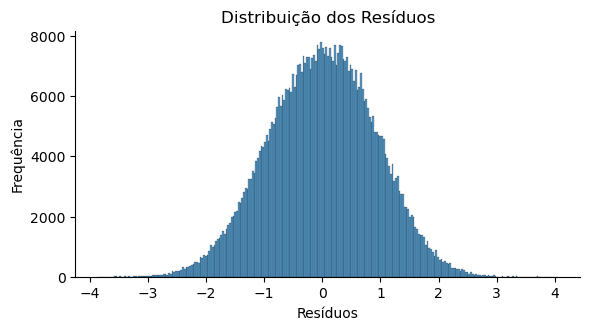

In [13]:
sns.displot(reg_linear.resid, height=3, aspect=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show();

A distribuição dos resíduos segue o formato de sino.

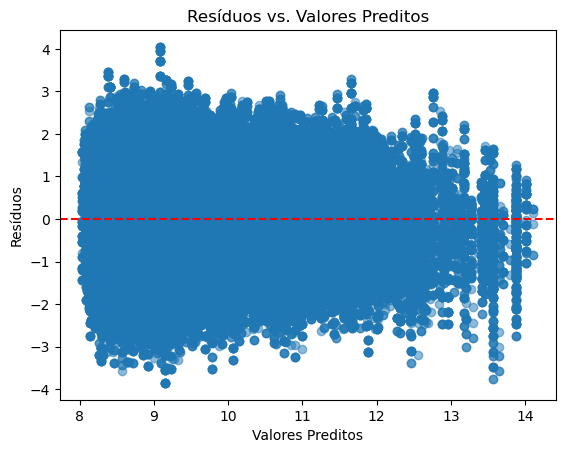

In [14]:
plt.scatter(reg_linear.fittedvalues, reg_linear.resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.show()

O gráfico dos resíduos mostra que não há um padrão de resíduos.

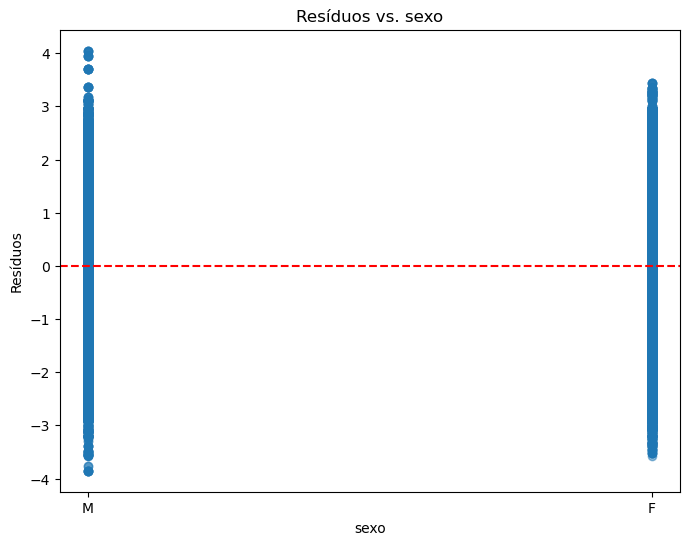

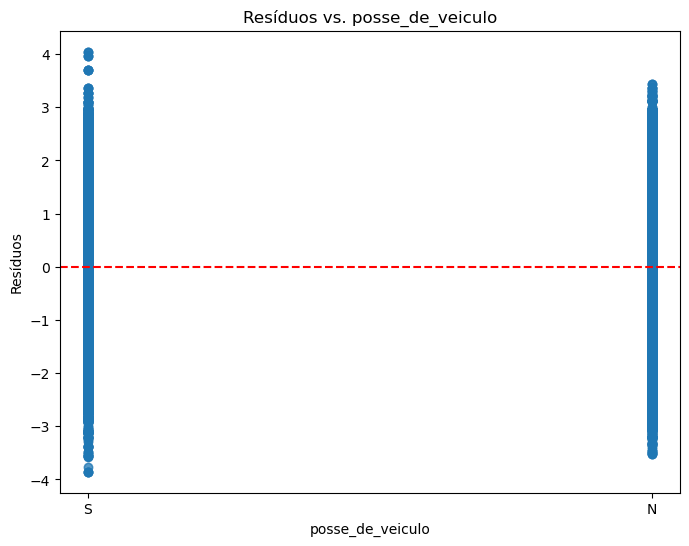

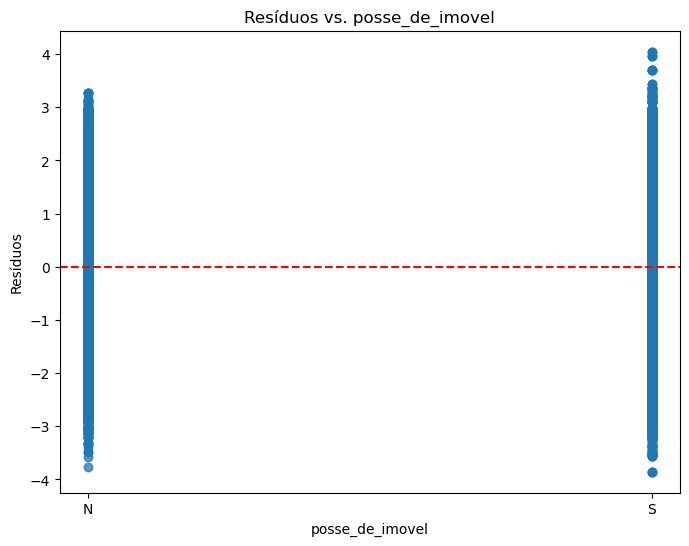

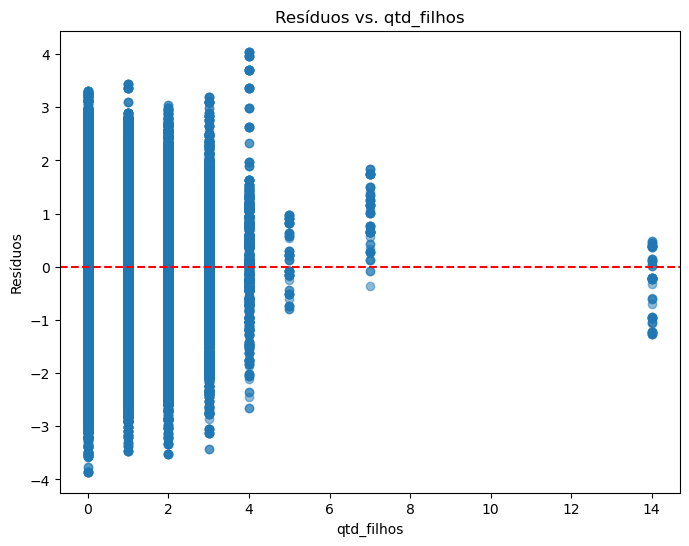

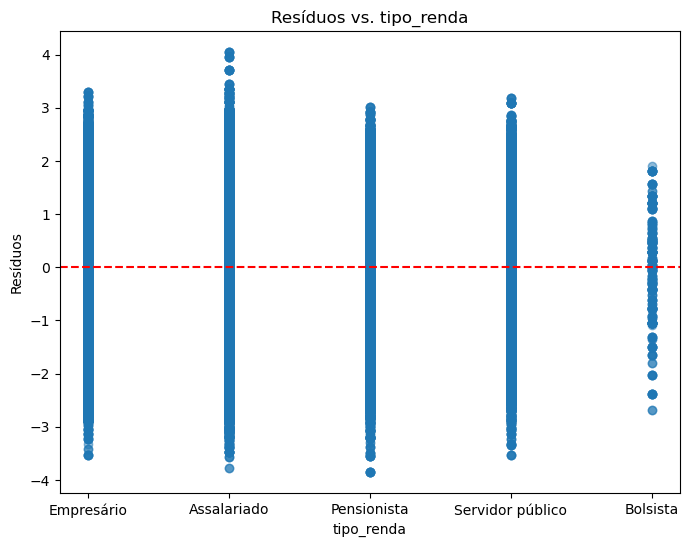

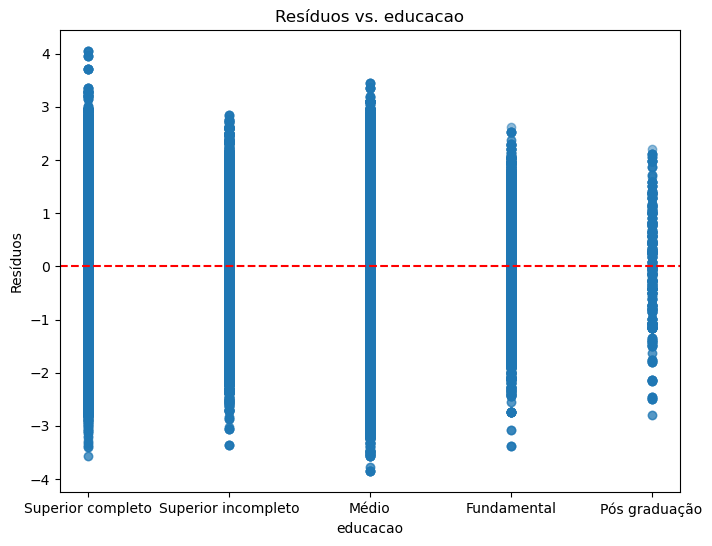

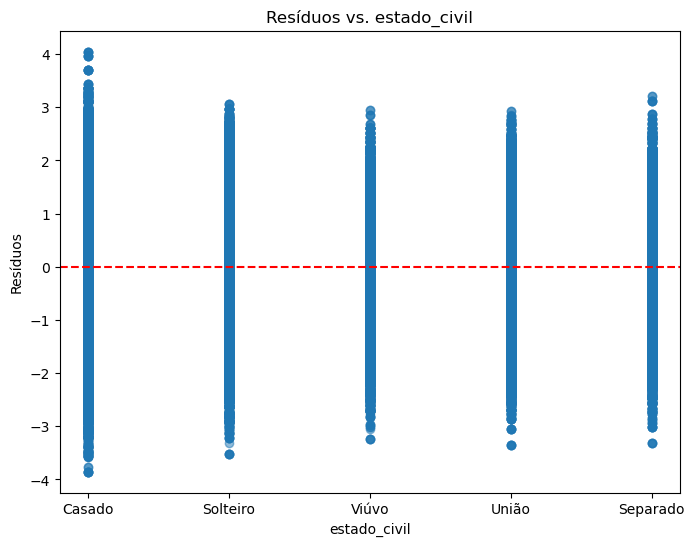

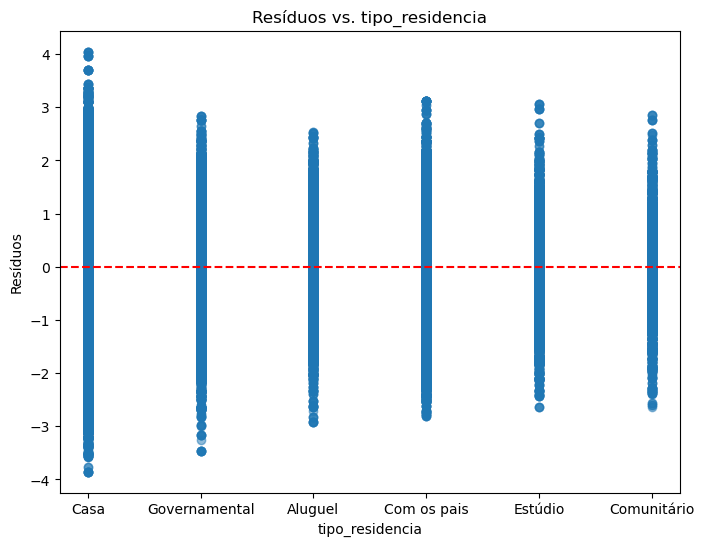

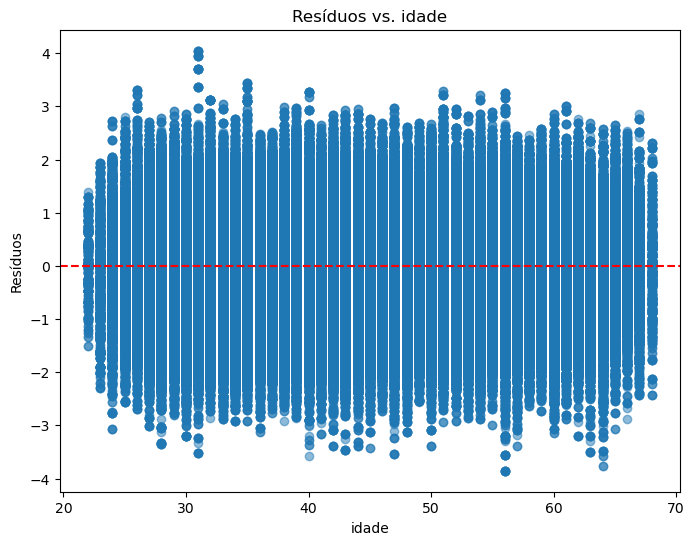

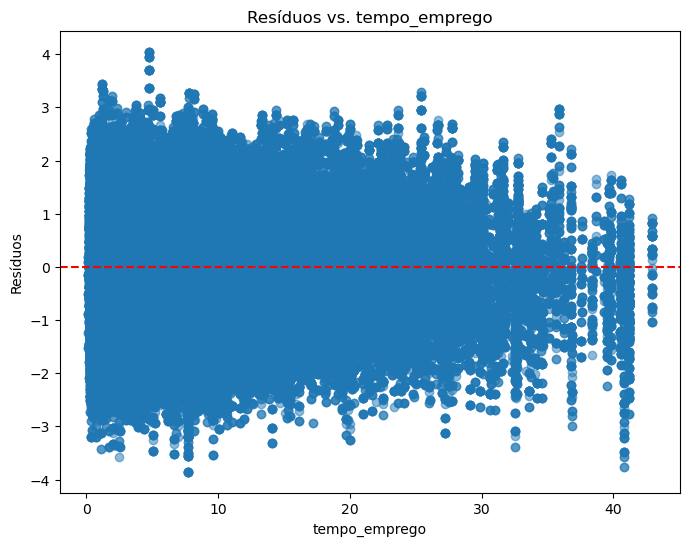

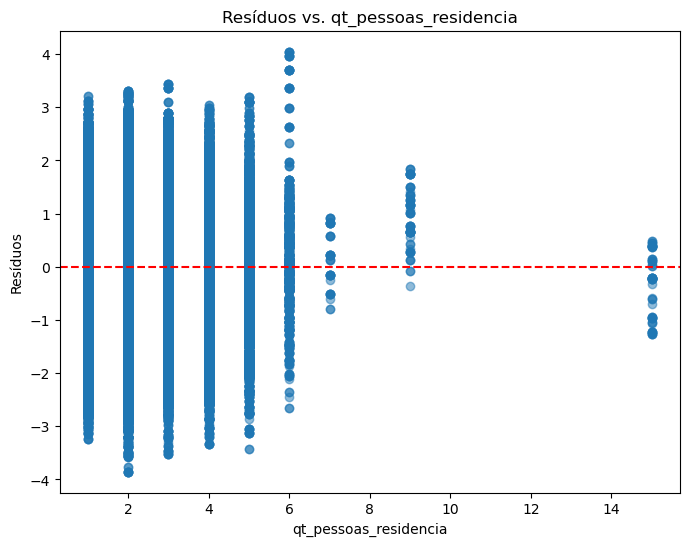

In [15]:
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 
             'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 
             'idade', 'tempo_emprego', 'qt_pessoas_residencia']

for var in variaveis:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_train[var], reg_linear.resid, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(var)
    plt.ylabel('Resíduos')
    plt.title(f'Resíduos vs. {var}')
    plt.show()

Os gráficos dos resíduos para cada uma das variáveis explicativas não mostram padrão de resíduos.

mes
2015-01   -0.966454
2015-02   -0.673683
2015-03   -0.324381
2015-04    0.061259
2015-05    0.408461
2015-06    0.663359
2015-07    0.750485
2015-08    0.662316
2015-09    0.390784
2015-10    0.047288
2015-11   -0.337456
2015-12   -0.681977
Freq: M, Name: residuos, dtype: float64


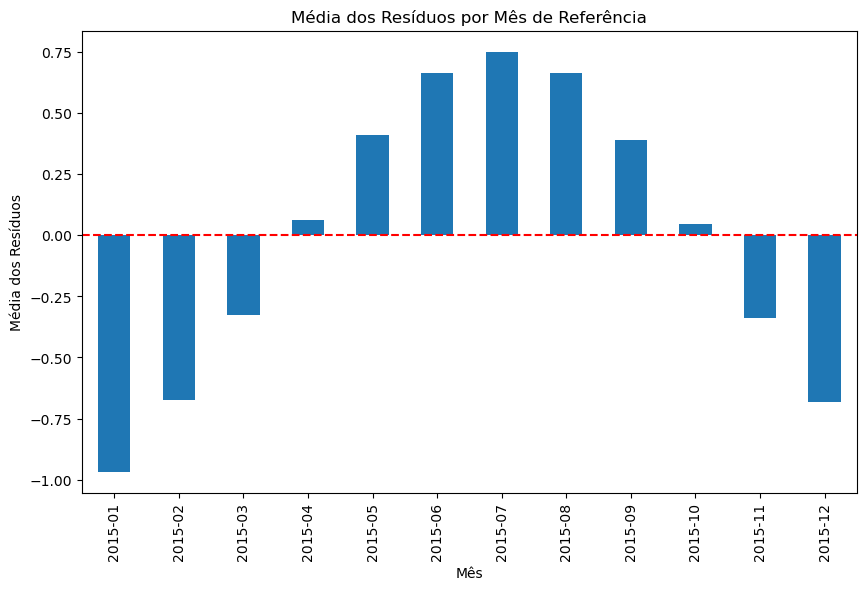

In [16]:
df_train['mes'] = df_train['data'].dt.to_period('M')
df_train['residuos'] = reg_linear.resid
media_residuos_mes = df_train.groupby('mes')['residuos'].mean()
print(media_residuos_mes)
plt.figure(figsize=(10, 6))
media_residuos_mes.plot(kind='bar')
plt.axhline(0, color='red', linestyle='--')
plt.title('Média dos Resíduos por Mês de Referência')
plt.xlabel('Mês')
plt.ylabel('Média dos Resíduos')
plt.show()

O valor médio dos resíduos, por mais que tenha variações elas flutuam em torno de zero

### Insight:

De acordo coms gráficos acima, as suposições do modelo de regressão linear parecem estar atendidas.

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

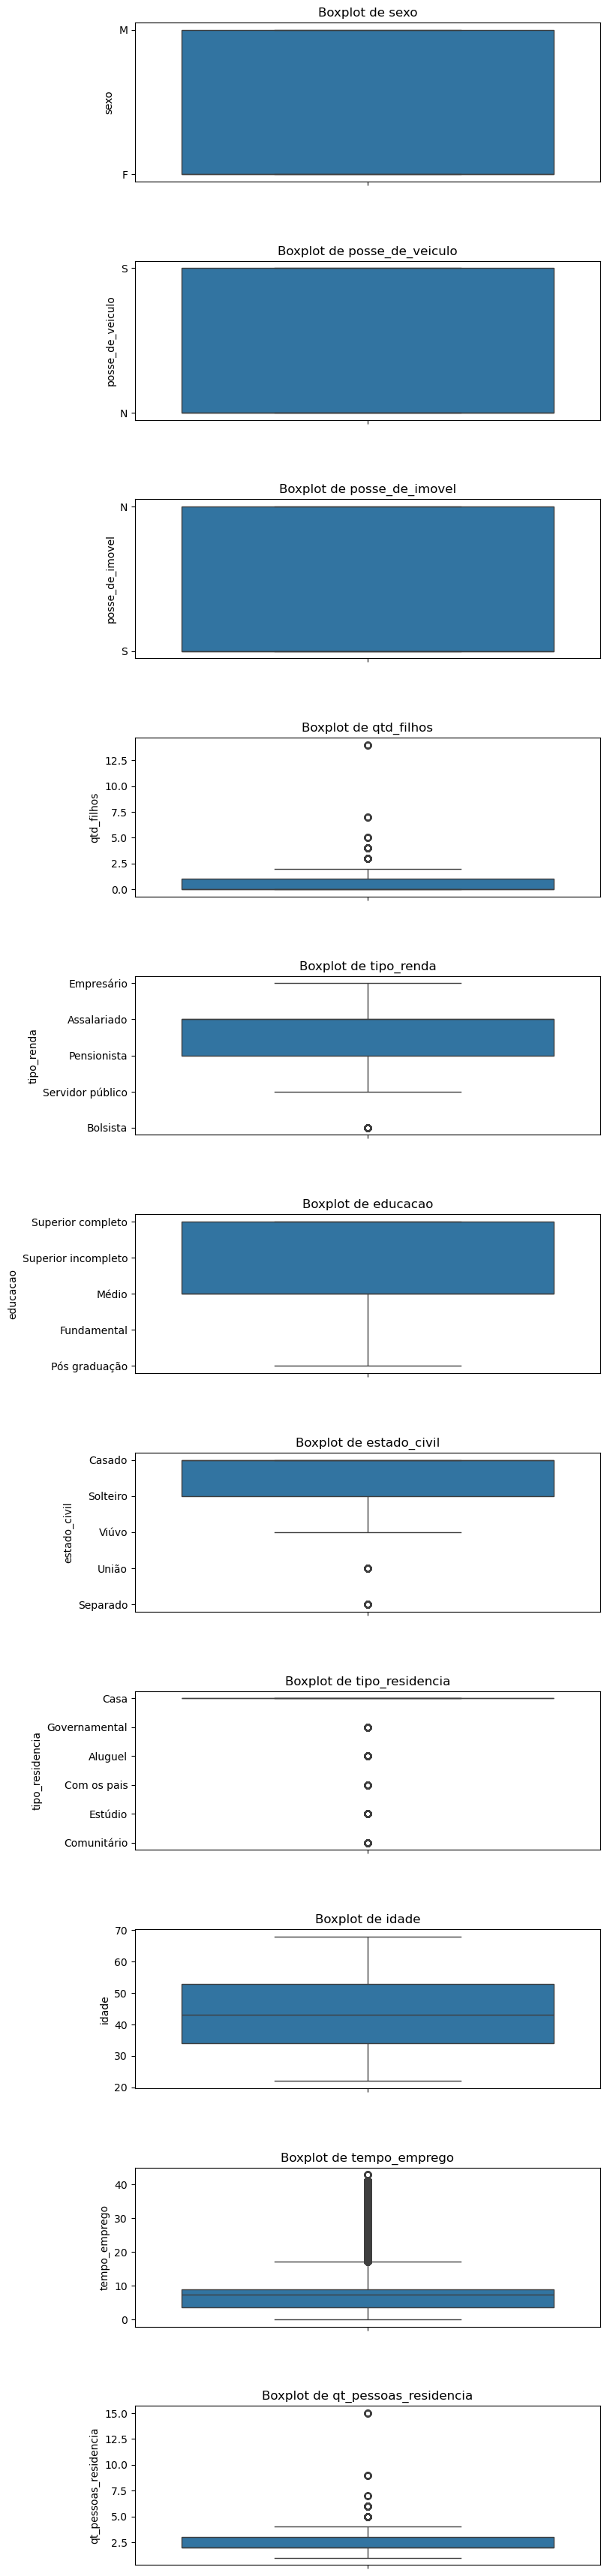

In [17]:
variaveis_independentes = ['sexo', 'posse_de_veiculo', 'posse_de_imovel',
                           'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
                           'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']

fig, axes = plt.subplots(nrows=len(variaveis_independentes), ncols=1, figsize=(8, 4 * len(variaveis_independentes)))
plt.subplots_adjust(wspace=0.4, hspace=0.5)
for i, var in enumerate(variaveis_independentes):
    sns.boxplot(y=var, data=df_train, ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

plt.show()

<Axes: ylabel='tempo_emprego'>

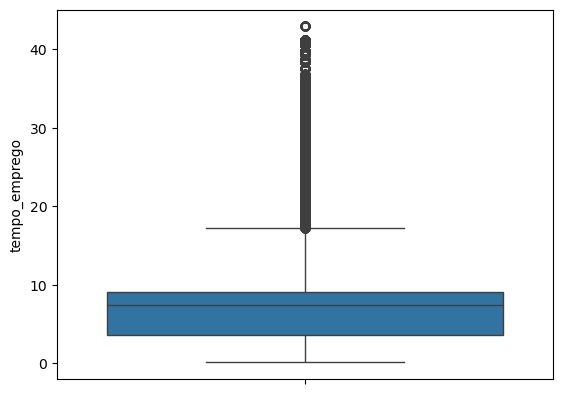

In [18]:
sns.boxplot(y = 'tempo_emprego',data=df_train)

A variável que mais chamou atenção no boxplot foi ``tempo_emprego``. Portanto, vamos destacá-la e analisá-la com mais detalhes.

Realizei alguns testes e concluí que é praticamente impossível incluir todas as linhas nos gráficos acima, devido ao tempo de processamento e à poluição visual. Portanto, selecionei uma pequena amostra do dataframe para utilizarmos como modelo visual.

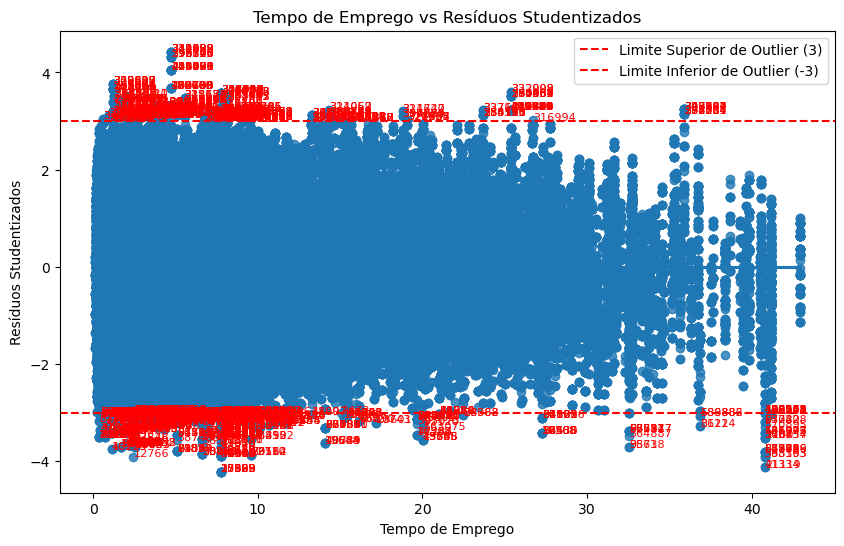

In [19]:
df_train.reset_index(drop=True, inplace=True)

infl = reg_linear.get_influence()
studentized_residuals = infl.resid_studentized_internal

df_train = df_train.copy()
df_train['studentized_residuals'] = studentized_residuals

outliers_train = []

fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x='tempo_emprego', y='studentized_residuals', data=df_train, ax=ax, ci=None)

for i in range(len(df_train)):
    residual = df_train.iloc[i]['studentized_residuals']
    if residual > 3 or residual < -3:
        outliers_train.append(df_train.index[i])
        ax.annotate(str(df_train.index[i]), 
                    (df_train.iloc[i]['tempo_emprego'], residual), 
                    fontsize=8, color='red')

ax.axhline(y=3, color='r', linestyle='--', label='Limite Superior de Outlier (3)')
ax.axhline(y=-3, color='r', linestyle='--', label='Limite Inferior de Outlier (-3)')
ax.set_xlabel('Tempo de Emprego')
ax.set_ylabel('Resíduos Studentizados')
ax.set_title('Tempo de Emprego vs Resíduos Studentizados')
ax.legend()

plt.show()

In [20]:
print(f'Possíveis outliers: {len(outliers_train)}')

Possíveis outliers: 1019


São cerca de 1.019 usuários considerados outliers, com dados superiores a 3 ou inferiores a -3. Como a base de treino possui mais de 600 mil registros, o que dificultaria a análise visual e também exigiria muito poder computacional para fins acadêmicos, irei pegar uma pequena amostra onde os gráficos fiquem visíveis e sem poluição.

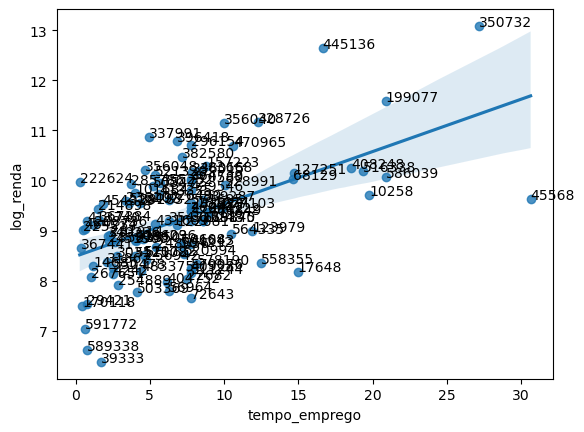

In [21]:
df_simplificado = df_train.sample(n=100, random_state=42)

fig, ax = plt.subplots()

sns.regplot(x='tempo_emprego', y='log_renda', data=df_simplificado, ax=ax)

for i in range(len(df_simplificado)):
    ax.annotate(str(df_simplificado.index[i]), 
                (df_simplificado.iloc[i]['tempo_emprego'], df_simplificado.iloc[i]['log_renda']))


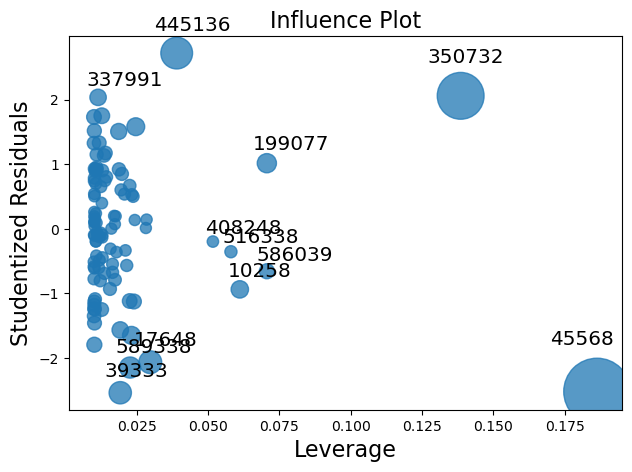

In [22]:
reg_simplificada = smf.ols('log_renda ~ tempo_emprego', data=df_simplificado).fit()

fig = sm.graphics.influence_plot(reg_simplificada, criterion="cooks")
fig.tight_layout(pad=1.0)

**Independência**

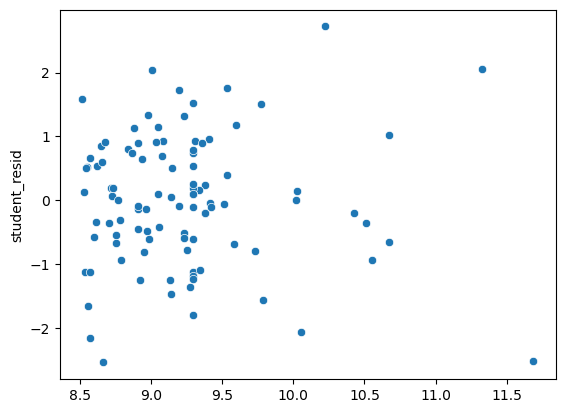

In [23]:
st_res_simplificada = reg_simplificada.outlier_test()
sns.scatterplot(x = reg_simplificada.predict(), y = st_res_simplificada.student_resid);

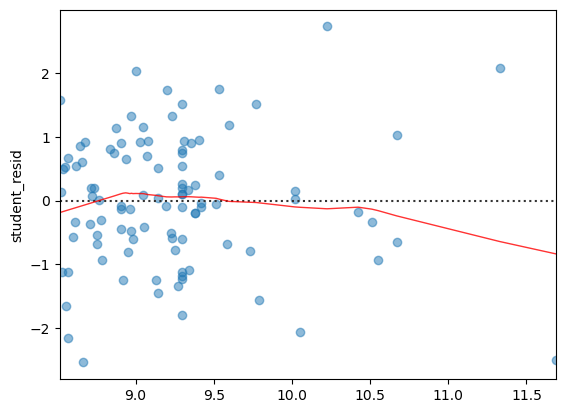

In [24]:
sns.residplot(x=reg_simplificada.predict(), y=st_res_simplificada.student_resid, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

**Variância**

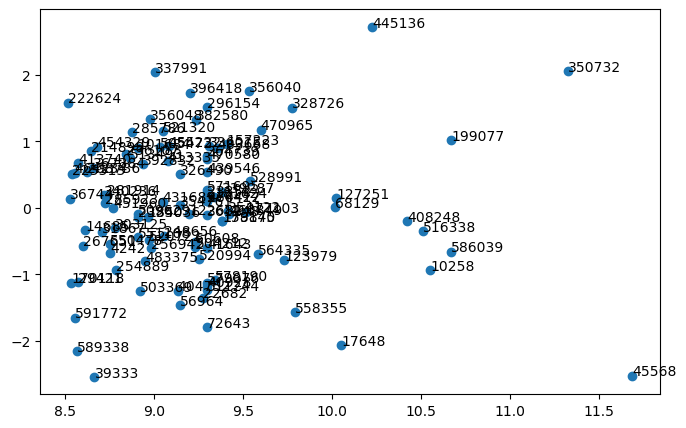

In [25]:
fig, ax = plt.subplots(figsize=(8, 5))

st_res_simplificada = reg_simplificada.outlier_test()

predicoes = reg_simplificada.predict()

ax.scatter(x=predicoes, y=st_res_simplificada['student_resid'])

for i in range(len(df_simplificado)):
    ax.annotate(str(df_simplificado.index[i]), 
                (predicoes[i], st_res_simplificada['student_resid'].iloc[i]))

plt.show()

**Pontos influentes**

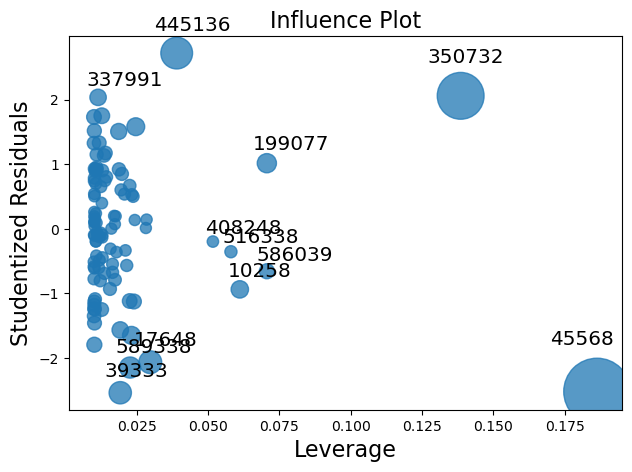

In [26]:
fig = sm.graphics.influence_plot(reg_simplificada, criterion="cooks")
fig.tight_layout(pad=1.0)

In [27]:
df_simplificado.sort_values(by='tempo_emprego', ascending=False).head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,data,log_renda,mes,residuos,studentized_residuals
45568,13937,M,S,N,0,Assalariado,Superior completo,Casado,Casa,56,30.638356,2.0,15094.24,2015-01-01,9.622068,2015-01,-2.690100,-2.942879
350732,9842,F,S,N,0,Assalariado,Médio,Solteiro,Casa,54,27.191781,1.0,481298.76,2015-08-01,13.084243,2015-08,1.447567,1.583591
586039,14178,F,S,N,0,Assalariado,Médio,Casado,Casa,56,20.887671,2.0,23780.30,2015-12-01,10.076613,2015-12,-0.749234,-0.819629
199077,14179,F,S,N,0,Assalariado,Médio,Casado,Casa,56,20.887671,2.0,107398.91,2015-04-01,11.584305,2015-04,0.758458,0.829720
10258,6081,F,N,S,0,Servidor público,Médio,Casado,Casa,50,19.761644,2.0,16371.36,2015-01-01,9.703289,2015-01,-1.265326,-1.384213


In [28]:
df_train.loc[445136, ['tempo_emprego', 'renda', 'log_renda']]

tempo_emprego    16.630137
renda            308038.97
log_renda        12.637982
Name: 445136, dtype: object

### Insight: 
Com base nas análises acima, selecionamos três indivíduos para examinar o comportamento:
- ``45568``: Possui o maior tempo de emprego, mas sua renda não acompanha esse tempo, o que faz com que apareça como um outlier na regressão;
- ``350732``: Apresenta a mesma situação do indivíduo ``45568``;
- ``445136``: Tem uma renda relativamente alta em relação ao seu tempo de emprego, o que faz com que apareça como outlier;

No meu ponto de vista, essas são situações que podem ocorrer no mundo real, e, por isso, eu não consideraria esses individuos como outliers.

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

**Matriz de correlação de Pearson**

In [29]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(columns=['index'])
corr_pearson = df_numeric.corr()
corr_pearson

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.370815,-0.072543,0.890326,-0.036747,-0.025203
idade,-0.370815,1.000000,0.251433,-0.341422,0.093459,0.117096
tempo_emprego,-0.072543,0.251433,1.000000,-0.062517,0.458820,0.613297
qt_pessoas_residencia,0.890326,-0.341422,-0.062517,1.000000,-0.041855,-0.019221
renda,-0.036747,0.093459,0.458820,-0.041855,1.000000,0.484456
log_renda,-0.025203,0.117096,0.613297,-0.019221,0.484456,1.000000


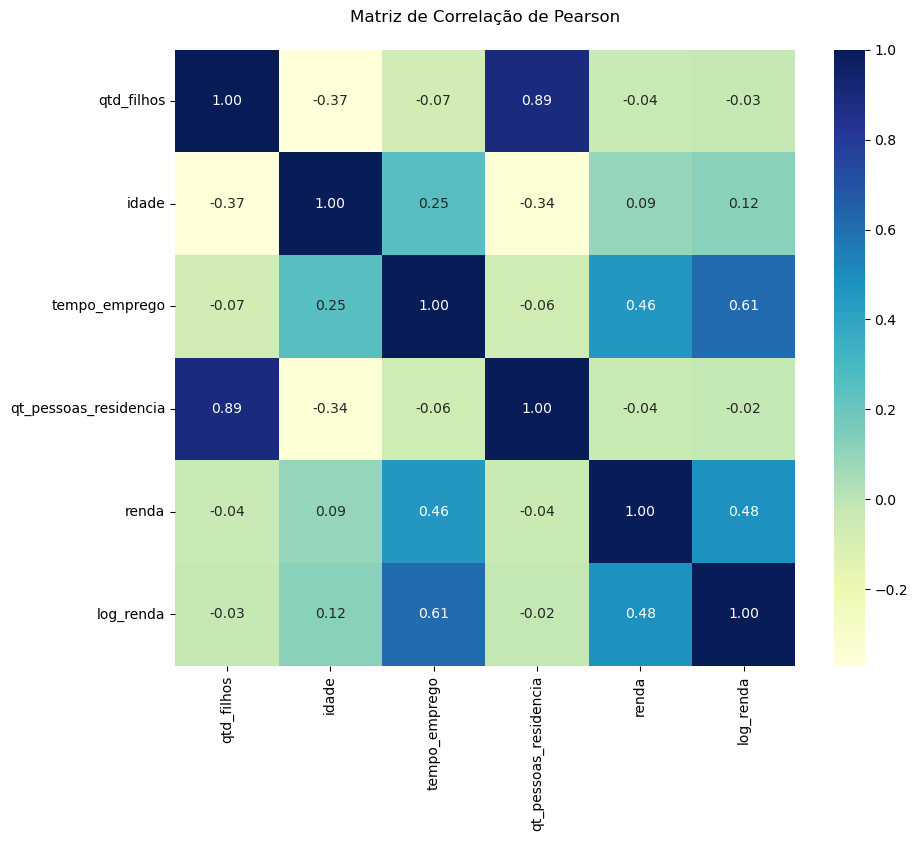

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Matriz de Correlação de Pearson', pad=20)
plt.show()

**Matriz de correlação de Spearman**

In [31]:
corr_spearman = df_numeric.corr(method='spearman')
corr_spearman

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.415151,-0.089260,0.828600,-0.019957,-0.019957
idade,-0.415151,1.000000,0.300547,-0.350006,0.107999,0.107999
tempo_emprego,-0.089260,0.300547,1.000000,-0.058139,0.501354,0.501354
qt_pessoas_residencia,0.828600,-0.350006,-0.058139,1.000000,-0.008260,-0.008260
renda,-0.019957,0.107999,0.501354,-0.008260,1.000000,1.000000
log_renda,-0.019957,0.107999,0.501354,-0.008260,1.000000,1.000000


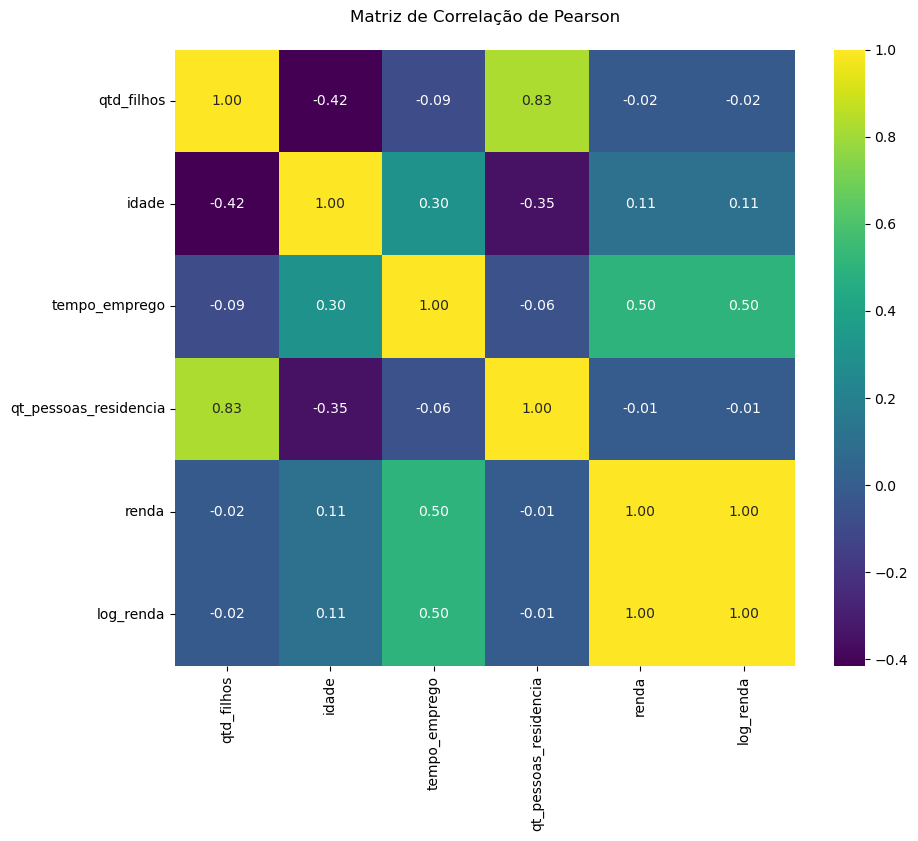

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriz de Correlação de Pearson', pad=20)
plt.show()

**Coeficiente v de Cramer**

In [33]:
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia']

df_dum = pd.get_dummies(df[variaveis], drop_first=True)
df_dum = df_dum.astype(float)
df_dum = df_dum.dropna()

df_dum.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
data_ref,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,47.0,16.717808,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,0.0,30.0,9.600000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,0.0,28.0,8.208219,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,2.0,44.0,1.301370,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,2.0,33.0,1.254795,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
def cramers_corrected_stat(x, y):
    """Calculate Cramer's V statistic for categorical-categorical association."""
    result = -1
    if len(x.value_counts()) == 1:
        print("First variable is constant")
    elif len(y.value_counts()) == 1:
        print("Second variable is constant")
    else:
        conf_matrix = pd.crosstab(x, y)

        if conf_matrix.shape[0] == 2:
            correct = False
        else:
            correct = True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2 / n
        r, k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1) * (r-1)) / (n-1))    
        rcorr = r - ((r-1)**2) / (n-1)
        kcorr = k - ((k-1)**2) / (n-1)
        result = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
        return result
    
def cram(x, y, max_cat=5):
    if (np.dtype(x) in {np.dtype('float64'), np.dtype('int64')}) and (len(np.unique(x)) > max_cat):
        x_ = pd.qcut(x, max_cat, duplicates='drop')  # Correção aqui
    else:
        x_ = x
    
    if (np.dtype(y) in {np.dtype('float64'), np.dtype('int64')}) and (len(np.unique(y)) > max_cat):
        y_ = pd.qcut(y, max_cat, duplicates='drop')  # Correção aqui
    else:
        y_ = y
    
    return cramers_corrected_stat(x_, y_)


In [35]:
matriz_cramer = pd.DataFrame(np.zeros((len(variaveis), len(variaveis))), 
                             columns=variaveis, 
                             index=variaveis)

for i, var1 in enumerate(variaveis):
    for j, var2 in enumerate(variaveis):
        if i <= j:
            matriz_cramer.loc[var1, var2] = cram(df[var1], df[var2], 5)
            matriz_cramer.loc[var2, var1] = matriz_cramer.loc[var1, var2]

matriz_cramer

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia
sexo,1.000000,0.367429,0.055341,0.090412,0.189990,0.022738,0.169893,0.095844,0.212160,0.158450,0.138652
posse_de_veiculo,0.367429,1.000000,0.025388,0.081155,0.152657,0.094503,0.168110,0.051690,0.178861,0.124322,0.131246
posse_de_imovel,0.055341,0.025388,1.000000,0.012870,0.099367,0.056308,0.052923,0.211327,0.134968,0.078602,0.012347
qtd_filhos,0.090412,0.081155,0.012870,1.000000,0.153362,0.043875,0.152168,0.037420,0.294919,0.097887,0.977711
tipo_renda,0.189990,0.152657,0.099367,0.153362,1.000000,0.090773,0.107485,0.061412,0.369537,0.366767,0.176702
educacao,0.022738,0.094503,0.056308,0.043875,0.090773,1.000000,0.037518,0.050060,0.112208,0.058675,0.057365
estado_civil,0.169893,0.168110,0.052923,0.152168,0.107485,0.037518,1.000000,0.045602,0.138718,0.082306,0.216110
tipo_residencia,0.095844,0.051690,0.211327,0.037420,0.061412,0.050060,0.045602,1.000000,0.111813,0.065515,0.049833
idade,0.212160,0.178861,0.134968,0.294919,0.369537,0.112208,0.138718,0.111813,1.000000,0.291187,0.316381
tempo_emprego,0.158450,0.124322,0.078602,0.097887,0.366767,0.058675,0.082306,0.065515,0.291187,1.000000,0.126933


Podemos notar que há um grande asssociação 2x2 nas variáveis ``qtd_filhos`` e ``qt_pessoas_residencia``.

**Variance Inflation Factor**

In [36]:
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia']

df_dum = pd.get_dummies(df[variaveis], drop_first=True)
df_dum = df_dum.astype(float)
df_dum = df_dum.dropna()

df_dum.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
data_ref,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,47.0,16.717808,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,0.0,30.0,9.600000,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,0.0,28.0,8.208219,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,2.0,44.0,1.301370,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-01,2.0,33.0,1.254795,4.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,34.53,qtd_filhos
1,34.63,idade
2,3.02,tempo_emprego
3,241.30,qt_pessoas_residencia
4,1.82,sexo_M
5,1.97,posse_de_veiculo_S
6,3.24,posse_de_imovel_S
7,1.00,tipo_renda_Bolsista
8,1.48,tipo_renda_Empresário
9,2.20,tipo_renda_Pensionista


In [38]:
# rodando modelo com todas variaveis
r_all = smf.ols('''
    log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos +
    tipo_renda + educacao + estado_civil + tipo_residencia + idade +
    tempo_emprego + qt_pessoas_residencia
    ''', data=df.dropna()).fit()

r_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 2.026e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:52:03   Log-Likelihood:            -1.0644e+06
No. Observations:              750000   AIC:                         2.129e+06
Df Residuals:                  749975   BIC:                         2.129e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.4061      0.046    159.348      0.000       7.315       7.497
sexo[T.M]                            0.1267      0.003     46.453      0.000       0.121       0.132
posse_de_veiculo[T.S]                0.0150      0.003      5.797      0.000       0.010       0.020
posse_de_imovel[T.S]                 0.1874      0.003     73.837      0.000       0.182       0.192
tipo_renda[T.Bolsista]              -0.1577      0.052     -3.055      0.002      -0.259      -0.057
tipo_renda[T.Empresário]             0.1527      0.003     52.171      0.000       0.147       0.158
tipo_renda[T.Pensionista]           -0.2952      0.004    -70.676      0.000      -0.303      -0.287
tipo_renda[T.Servidor público]       0.1459      0.004     33.880      0.000       0.137       0.154
educacao[T.Médio]                    0.0554      0.011      5.047      0.000       0.034       0.077
educacao[T.Pós graduação]            0.1196      0.037      3.230      0.001       0.047       0.192
educacao[T.Superior completo]        0.0484      0.011      4.369      0.000       0.027       0.070
educacao[T.Superior incompleto]      0.0342      0.012      2.756      0.006       0.010       0.059
estado_civil[T.Separado]             0.1895      0.022      8.448      0.000       0.146       0.233
estado_civil[T.Solteiro]             0.1658      0.022      7.535      0.000       0.123       0.209
estado_civil[T.União]                0.0022      0.004      0.489      0.625      -0.006       0.011
estado_civil[T.Viúvo]                0.1658      0.023      7.310      0.000       0.121       0.210
tipo_residencia[T.Casa]             -0.0654      0.010     -6.583      0.000      -0.085      -0.046
tipo_residencia[T.Com os pais]      -0.0319      0.011     -2.831      0.005      -0.054      -0.010
tipo_residencia[T.Comunitário]      -0.1015      0.020     -5.053      0.000      -0.141      -0.062
tipo_residencia[T.Estúdio]          -0.1041      0.017     -6.196      0.000      -0.137      -0.071
tipo_residencia[T.Governamental]    -0.0782      0.012     -6.607      0.000      -0.101      -0.055
qtd_filhos                          -0.1539      0.022     -7.024      0.000      -0.197      -0.111
idade                                0.0036      0.000     23.503      0.000       0.003       0.004
tempo_emprego                        0.1290      0.000    633.271      0.000       0.129       0.129
qt_pessoas_residencia                0.1589      0.022      7.268      0.000       0.116       0.202
==============================================================================
Omnibus:                     3976.623   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2865.722
Skew:             

In [39]:
# Rodando modelo sem qt_pessoas_residencia que tinha um alto valor de VIF
r1 = smf.ols('''
    log_renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos +
    tipo_renda + educacao + estado_civil + tipo_residencia + idade +
    tempo_emprego''', data=df.dropna()).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 2.114e+04
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:52:23   Log-Likelihood:            -1.0644e+06
No. Observations:              750000   AIC:                         2.129e+06
Df Residuals:                  749976   BIC:                         2.129e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.7234      0.016    483.781      0.000       7.692       7.755
sexo[T.M]                            0.1265      0.003     46.387      0.000       0.121       0.132
posse_de_veiculo[T.S]                0.0151      0.003      5.831      0.000       0.010       0.020
posse_de_imovel[T.S]                 0.1874      0.003     73.850      0.000       0.182       0.192
tipo_renda[T.Bolsista]              -0.1578      0.052     -3.057      0.002      -0.259      -0.057
tipo_renda[T.Empresário]             0.1526      0.003     52.128      0.000       0.147       0.158
tipo_renda[T.Pensionista]           -0.2953      0.004    -70.693      0.000      -0.303      -0.287
tipo_renda[T.Servidor público]       0.1461      0.004     33.922      0.000       0.138       0.155
educacao[T.Médio]                    0.0554      0.011      5.045      0.000       0.034       0.077
educacao[T.Pós graduação]            0.1196      0.037      3.228      0.001       0.047       0.192
educacao[T.Superior completo]        0.0485      0.011      4.377      0.000       0.027       0.070
educacao[T.Superior incompleto]      0.0343      0.012      2.761      0.006       0.010       0.059
estado_civil[T.Separado]             0.0307      0.005      6.037      0.000       0.021       0.041
estado_civil[T.Solteiro]             0.0081      0.004      2.212      0.027       0.001       0.015
estado_civil[T.União]                0.0020      0.004      0.456      0.648      -0.007       0.011
estado_civil[T.Viúvo]                0.0069      0.006      1.139      0.255      -0.005       0.019
tipo_residencia[T.Casa]             -0.0653      0.010     -6.573      0.000      -0.085      -0.046
tipo_residencia[T.Com os pais]      -0.0317      0.011     -2.818      0.005      -0.054      -0.010
tipo_residencia[T.Comunitário]      -0.1014      0.020     -5.049      0.000      -0.141      -0.062
tipo_residencia[T.Estúdio]          -0.1039      0.017     -6.186      0.000      -0.137      -0.071
tipo_residencia[T.Governamental]    -0.0776      0.012     -6.558      0.000      -0.101      -0.054
qtd_filhos                           0.0048      0.002      2.818      0.005       0.001       0.008
idade                                0.0036      0.000     23.561      0.000       0.003       0.004
tempo_emprego                        0.1290      0.000    633.226      0.000       0.129       0.129
==============================================================================
Omnibus:                     3975.166   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2864.743
Skew:                          -0.023   Prob(JB):                         0.00
Kurtosis:                       2.701   

In [40]:
# Vars Vif sem qt_pessoas_residencia
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego']

df_dum = pd.get_dummies(df[variaveis], drop_first=True)
df_dum = df_dum.astype(float)
df_dum = df_dum.dropna()
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,1.59,qtd_filhos
1,30.78,idade
2,3.02,tempo_emprego
3,1.80,sexo_M
4,1.96,posse_de_veiculo_S
5,3.22,posse_de_imovel_S
6,1.00,tipo_renda_Bolsista
7,1.47,tipo_renda_Empresário
8,2.17,tipo_renda_Pensionista
9,1.20,tipo_renda_Servidor público


In [41]:
# Vars Vif sem tipo_residencia_Casa
df_dum = pd.get_dummies(df[variaveis], drop_first=True)

df_dum = df_dum.astype(float)

df_dum = df_dum.dropna()

df_dum = df_dum.drop(columns=['tipo_residencia_Casa'])

vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum.values, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,1.56,qtd_filhos
1,27.22,idade
2,3.02,tempo_emprego
3,1.80,sexo_M
4,1.96,posse_de_veiculo_S
5,3.19,posse_de_imovel_S
6,1.00,tipo_renda_Bolsista
7,1.47,tipo_renda_Empresário
8,2.15,tipo_renda_Pensionista
9,1.20,tipo_renda_Servidor público


In [42]:
# Vars Vif sem idade
df_dum = pd.get_dummies(df[variaveis], drop_first=True)

df_dum = df_dum.astype(float)

df_dum = df_dum.dropna()

df_dum = df_dum.drop(columns=['idade', 'tipo_residencia_Casa'])

vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum.values, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,1.48,qtd_filhos
1,2.71,tempo_emprego
2,1.80,sexo_M
3,1.96,posse_de_veiculo_S
4,3.12,posse_de_imovel_S
5,1.00,tipo_renda_Bolsista
6,1.47,tipo_renda_Empresário
7,1.48,tipo_renda_Pensionista
8,1.20,tipo_renda_Servidor público
9,5.30,educacao_Médio


In [43]:
df_dum.columns

Index(['qtd_filhos', 'tempo_emprego', 'sexo_M', 'posse_de_veiculo_S',
       'posse_de_imovel_S', 'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Médio', 'educacao_Pós graduação',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental'],
      dtype='object')

Encontramos um VIF em que todas as variáveis não apresentam problemas de multicolinearidade. Vamos rodar o modelo abaixo:

In [44]:
df_dum['log_renda'] = df['log_renda']

r_definitivo = smf.ols('''
    log_renda ~ qtd_filhos + tempo_emprego + sexo_M + posse_de_veiculo_S +
    posse_de_imovel_S + tipo_renda_Bolsista + tipo_renda_Empresário +
    tipo_renda_Pensionista + Q('tipo_renda_Servidor público') +
    Q('educacao_Médio') + Q('educacao_Pós graduação') +
    Q('educacao_Superior completo') + Q('educacao_Superior incompleto') +
    Q('estado_civil_Separado') + Q('estado_civil_Solteiro') + Q('estado_civil_União') +
    Q('estado_civil_Viúvo') + Q('tipo_residencia_Com os pais') +
    Q('tipo_residencia_Comunitário') + Q('tipo_residencia_Estúdio') +
    Q('tipo_residencia_Governamental')
    ''', data=df_dum).fit()

r_definitivo.summary().tables[0]

Dep. Variable:,log_renda,R-squared:,0.393
Model:,OLS,Adj. R-squared:,0.393
Method:,Least Squares,F-statistic:,2.310e+04
Date:,"Wed, 04 Sep 2024",Prob (F-statistic):,0.00
Time:,01:53:58,Log-Likelihood:,-1.0647e+06
No. Observations:,750000,AIC:,2.129e+06
Df Residuals:,749978,BIC:,2.130e+06
Df Model:,21,,
Covariance Type:,nonrobust,,


In [45]:
tabela = pd.read_html(r_definitivo.summary().tables[1].as_html(), header=0, index_col=0)[0]
tabela.style.format(decimal=',', precision=4)\
    .highlight_between(
        left=.05
        , axis=1
        , props='color:red'
        , subset='P>|t|'
    ).set_properties(**{'background-color': '#ffffb3'}, subset=['[0.025', '0.975]'])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,"7,8029","0,0110","685,0770","0,0000","7,7810","7,8250"
qtd_filhos,"-0,0070","0,0020","-4,2380","0,0000","-0,0100","-0,0040"
tempo_emprego,"0,1303","0,0000","668,1620","0,0000","0,1300","0,1310"
sexo_M,"0,1232","0,0030","45,2560","0,0000","0,1180","0,1280"
posse_de_veiculo_S,"0,0131","0,0030","5,0560","0,0000","0,0080","0,0180"
posse_de_imovel_S,"0,1915","0,0030","75,6860","0,0000","0,1870","0,1970"
tipo_renda_Bolsista,"-0,1354","0,0520","-2,6230","0,0090","-0,2370","-0,0340"
tipo_renda_Empresário,"0,1510","0,0030","51,5910","0,0000","0,1450","0,1570"
tipo_renda_Pensionista,"-0,2413","0,0030","-69,3920","0,0000","-0,2480","-0,2340"
Q('tipo_renda_Servidor público'),"0,1446","0,0040","33,5550","0,0000","0,1360","0,1530"


In [46]:
r_definitivo.summary().tables[2]

Omnibus:,3941.896,Durbin-Watson:,1.037
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2845.388
Skew:,-0.023,Prob(JB):,0.00
Kurtosis:,2.702,Cond. No.,444.


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

Vamos separar novamente o dataFrame de teste, incluindo apenas as variáveis que não possuem multicolinearidade e que têm p-valor menor que 0.05.

In [47]:
df1 = df_dum
df1 = df1.drop(['idade', 'tipo_residencia_Casa'], axis=1, errors='ignore')
print(df1.shape)
df1.head()

(750000, 22)


,qtd_filhos,tempo_emprego,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Médio,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,log_renda
data_ref,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,16.717808,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.318131
2015-01-01,0.0,9.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.793508
2015-01-01,0.0,8.208219,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.528769
2015-01-01,2.0,1.301370,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.767196
2015-01-01,2.0,1.254795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.673020


In [48]:
df1['data'] = df1.index
df1['data'] = pd.to_datetime(df1['data'])
df1_test = df1['2016-03-01':]
print(df1.columns)
print(df1_test.shape)
df1_test.head(3)

Index(['qtd_filhos', 'tempo_emprego', 'sexo_M', 'posse_de_veiculo_S',
       'posse_de_imovel_S', 'tipo_renda_Bolsista', 'tipo_renda_Empresário',
       'tipo_renda_Pensionista', 'tipo_renda_Servidor público',
       'educacao_Médio', 'educacao_Pós graduação',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental', 'log_renda', 'data'],
      dtype='object')
(50000, 23)


,qtd_filhos,tempo_emprego,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Médio,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,log_renda,data
data_ref,,,,,,,,,,,,,,,,,,,,,
2016-03-01,0.0,7.746165,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.760356,2016-03-01
2016-03-01,0.0,13.865753,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.354356,2016-03-01
2016-03-01,0.0,6.602740,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.924130,2016-03-01


In [49]:
r_test = smf.ols('''
    log_renda ~ qtd_filhos + tempo_emprego + sexo_M + posse_de_veiculo_S +
    posse_de_imovel_S + tipo_renda_Bolsista + tipo_renda_Empresário +
    tipo_renda_Pensionista + Q('tipo_renda_Servidor público') +
    Q('educacao_Médio') + Q('educacao_Pós graduação') +
    Q('educacao_Superior completo') + Q('educacao_Superior incompleto') +
    Q('estado_civil_Separado') + Q('estado_civil_Solteiro') + Q('estado_civil_União') +
    Q('estado_civil_Viúvo') + Q('tipo_residencia_Com os pais') +
    Q('tipo_residencia_Comunitário') + Q('tipo_residencia_Estúdio') +
    Q('tipo_residencia_Governamental')
    ''', data=df1_test).fit()

r_test.summary().tables[0]

Dep. Variable:,log_renda,R-squared:,0.559
Model:,OLS,Adj. R-squared:,0.559
Method:,Least Squares,F-statistic:,3022.
Date:,"Wed, 04 Sep 2024",Prob (F-statistic):,0.00
Time:,01:53:58,Log-Likelihood:,-54029.
No. Observations:,50000,AIC:,1.081e+05
Df Residuals:,49978,BIC:,1.083e+05
Df Model:,21,,
Covariance Type:,nonrobust,,


In [50]:
tabela = pd.read_html(r_test.summary().tables[1].as_html(), header=0, index_col=0)[0]
tabela.style.format(decimal=',', precision=4)\
    .highlight_between(
        left=.05
        , axis=1
        , props='color:red'
        , subset='P>|t|'
    ).set_properties(**{'background-color': '#ffffb3'}, subset=['[0.025', '0.975]'])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,"6,6846","0,0320","211,3410","0,0000","6,6230","6,7470"
qtd_filhos,"-0,0166","0,0050","-3,6190","0,0000","-0,0260","-0,0080"
tempo_emprego,"0,1306","0,0010","241,7570","0,0000","0,1300","0,1320"
sexo_M,"0,1256","0,0080","16,7010","0,0000","0,1110","0,1400"
posse_de_veiculo_S,"0,0083","0,0070","1,1580","0,2470","-0,0060","0,0220"
posse_de_imovel_S,"0,1913","0,0070","27,3260","0,0000","0,1780","0,2050"
tipo_renda_Bolsista,"-0,0737","0,1260","-0,5830","0,5600","-0,3210","0,1740"
tipo_renda_Empresário,"0,1535","0,0080","18,9880","0,0000","0,1380","0,1690"
tipo_renda_Pensionista,"-0,2377","0,0100","-24,7880","0,0000","-0,2570","-0,2190"
Q('tipo_renda_Servidor público'),"0,1260","0,0120","10,7390","0,0000","0,1030","0,1490"


In [51]:
r_test.summary().tables[2]

Omnibus:,4.535,Durbin-Watson:,1.997
Prob(Omnibus):,0.104,Jarque-Bera (JB):,4.615
Skew:,-0.011,Prob(JB):,0.0995
Kurtosis:,3.041,Cond. No.,392.


In [52]:
r_test1 = smf.ols('''
    log_renda ~ qtd_filhos + tempo_emprego + sexo_M +
    posse_de_imovel_S + tipo_renda_Empresário +
    tipo_renda_Pensionista + Q('tipo_renda_Servidor público') +
    Q('educacao_Pós graduação') + Q('educacao_Superior completo') +
    Q('estado_civil_Separado')''', data=df1_test).fit()

r_test1.summary().tables[0]

Dep. Variable:,log_renda,R-squared:,0.559
Model:,OLS,Adj. R-squared:,0.559
Method:,Least Squares,F-statistic:,6346.
Date:,"Wed, 04 Sep 2024",Prob (F-statistic):,0.00
Time:,01:53:58,Log-Likelihood:,-54033.
No. Observations:,50000,AIC:,1.081e+05
Df Residuals:,49989,BIC:,1.082e+05
Df Model:,10,,
Covariance Type:,nonrobust,,


In [53]:
tabela = pd.read_html(r_test1.summary().tables[1].as_html(), header=0, index_col=0)[0]
tabela.style.format(decimal=',', precision=4)\
    .highlight_between(
        left=.05
        , axis=1
        , props='color:red'
        , subset='P>|t|'
    ).set_properties(**{'background-color': '#ffffb3'}, subset=['[0.025', '0.975]'])


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,"6,6870","0,0090","737,0470","0,0000","6,6690","6,7050"
qtd_filhos,"-0,0153","0,0050","-3,3800","0,0010","-0,0240","-0,0060"
tempo_emprego,"0,1305","0,0010","242,7820","0,0000","0,1290","0,1320"
sexo_M,"0,1290","0,0070","18,4100","0,0000","0,1150","0,1430"
posse_de_imovel_S,"0,1908","0,0070","27,9110","0,0000","0,1770","0,2040"
tipo_renda_Empresário,"0,1535","0,0080","19,0490","0,0000","0,1380","0,1690"
tipo_renda_Pensionista,"-0,2388","0,0090","-25,4250","0,0000","-0,2570","-0,2200"
Q('tipo_renda_Servidor público'),"0,1262","0,0120","10,7750","0,0000","0,1030","0,1490"
Q('educacao_Pós graduação'),"0,3261","0,0910","3,5640","0,0000","0,1470","0,5050"
Q('educacao_Superior completo'),"0,0955","0,0060","14,7600","0,0000","0,0830","0,1080"


In [54]:
r_test1.summary().tables[2]

Omnibus:,4.474,Durbin-Watson:,1.997
Prob(Omnibus):,0.107,Jarque-Bera (JB):,4.561
Skew:,-0.010,Prob(JB):,0.102
Kurtosis:,3.042,Cond. No.,283.


**Distribuição de residuos**

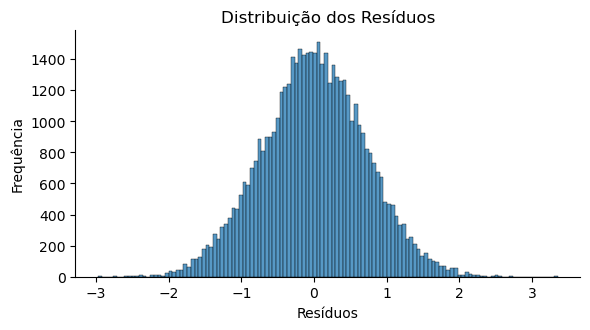

In [55]:
sns.displot(r_test1.resid, height=3, aspect=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show();

**Outliers**

<Axes: ylabel='tempo_emprego'>

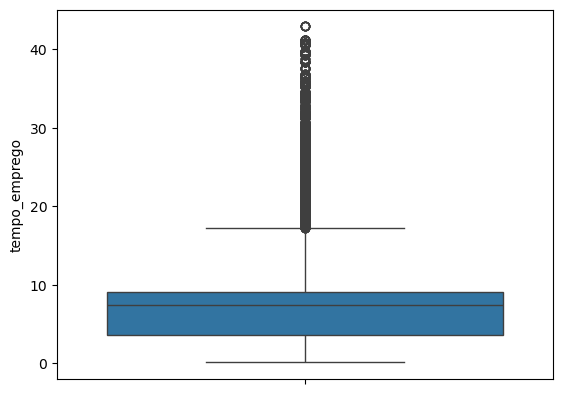

In [56]:
sns.boxplot(y = 'tempo_emprego',data=df1_test)

Possíveis outliers: 138


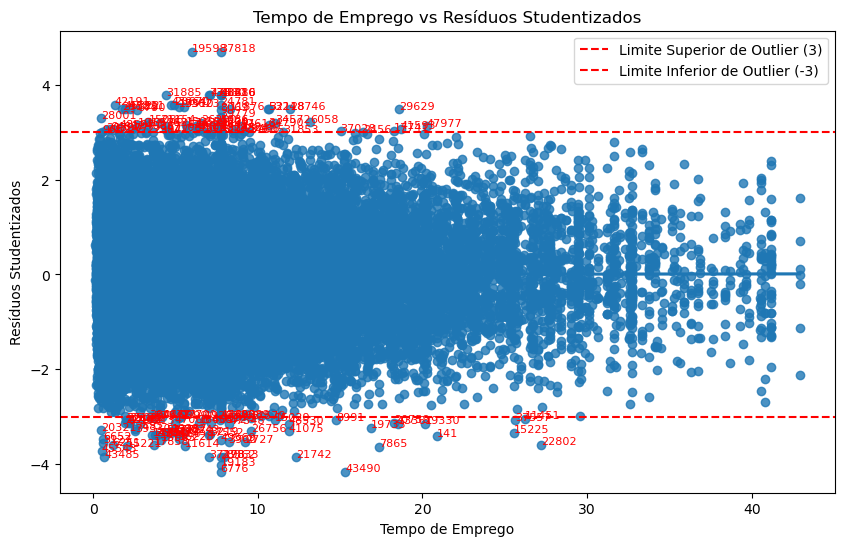

In [57]:
infl = r_test1.get_influence()
studentized_residuals = infl.resid_studentized_internal

df2_test = df1_test.sample(len(studentized_residuals)).copy()
df2_test['studentized_residuals'] = studentized_residuals
df2_test.reset_index(drop=True, inplace=True)

outliers_indices = []

fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x='tempo_emprego', y='studentized_residuals', data=df2_test, ax=ax, ci=None)

for i in range(len(df2_test)):
    residual = df2_test.iloc[i]['studentized_residuals']
    if residual > 3 or residual < -3:
        outliers_indices.append(df2_test.index[i])
        ax.annotate(str(df2_test.index[i]), 
                    (df2_test.iloc[i]['tempo_emprego'], residual), 
                    fontsize=8, color='red')

ax.axhline(y=3, color='r', linestyle='--', label='Limite Superior de Outlier (3)')
ax.axhline(y=-3, color='r', linestyle='--', label='Limite Inferior de Outlier (-3)')
ax.set_xlabel('Tempo de Emprego')
ax.set_ylabel('Resíduos Studentizados')
ax.set_title('Tempo de Emprego vs Resíduos Studentizados')
ax.legend()
print(f'Possíveis outliers: {len(outliers_indices)}')
plt.show()

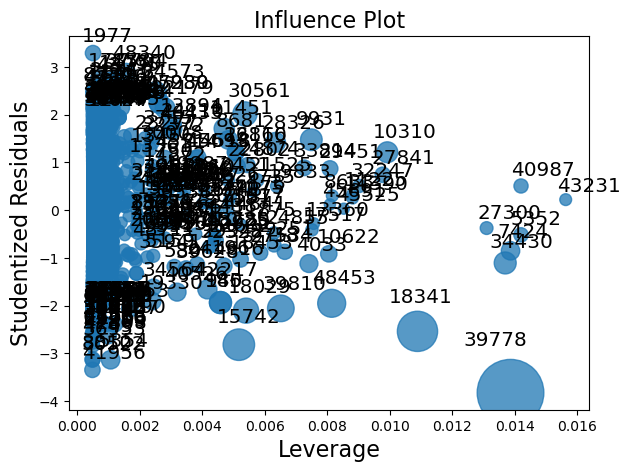

In [60]:
influence = r_test1.get_influence()
cooks_d = influence.cooks_distance[0]
threshold = 4 / len(df2_test)
df_maiores_influence = df2_test[cooks_d > threshold]
reg_df_maiores_influence = smf.ols('log_renda ~ tempo_emprego', data=df_maiores_influence).fit()
fig = sm.graphics.influence_plot(reg_df_maiores_influence, criterion="cooks")
fig.tight_layout(pad=1.0)
plt.show()

In [63]:
influence = reg_df_maiores_influence.get_influence()
leverage = influence.hat_matrix_diag
df_maiores_influence['leverage'] = leverage
df_leverage = df_maiores_influence.sort_values(by='leverage', ascending=False)
top_leverage = df_leverage.head(5).index.tolist()

print(f'Top 5 pontos com maior leverage: {top_leverage}')

Top 5 pontos com maior leverage: [43231, 5352, 40987, 7424, 39778]


In [64]:
df2_test.sort_values(by='tempo_emprego', ascending=False).head()

,qtd_filhos,tempo_emprego,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Médio,...,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,log_renda,data,studentized_residuals
23419,0.0,42.906849,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.577035,2016-03-01,-0.206873
47270,0.0,42.906849,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.821733,2016-03-01,1.617065
10294,0.0,42.906849,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.577035,2016-03-01,0.122496
24614,0.0,42.906849,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.821733,2016-03-01,0.707319
32948,0.0,42.906849,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.577035,2016-03-01,-1.129386


In [65]:
df2_test.sort_values(by='tempo_emprego', ascending=True).head()

,qtd_filhos,tempo_emprego,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,tipo_renda_Servidor público,educacao_Médio,...,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,log_renda,data,studentized_residuals
32964,0.0,0.117808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.255884,2016-03-01,0.627353
3373,0.0,0.117808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.255884,2016-03-01,-0.112590
36207,1.0,0.178082,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.175207,2016-03-01,0.240216
18639,1.0,0.178082,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.175207,2016-03-01,2.134080
11464,1.0,0.178082,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.175207,2016-03-01,-1.365392


In [67]:
for valor in top_leverage:
    print(valor)
    print(df2_test.loc[valor, ['tempo_emprego', 'log_renda']])
    print('\n')

43231
tempo_emprego    42.906849
log_renda        12.577035
Name: 43231, dtype: object


5352
tempo_emprego         41.2
log_renda        11.824911
Name: 5352, dtype: object


40987
tempo_emprego         41.2
log_renda        12.563702
Name: 40987, dtype: object


7424
tempo_emprego    40.786301
log_renda         11.53076
Name: 7424, dtype: object


39778
tempo_emprego    40.786301
log_renda         9.395278
Name: 39778, dtype: object




### Insight

- Depois de todos os processos realizados nos outros exercícios, conseguimos aumentar consideravelmente o R-quadrado do modelo na base de teste, de 0,43 para 0,55.
- Considerando as análises de outliers, não consegui identificar esses pontos como valores atípicos, por isso não fiz a eliminação nem a truncagem.